<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Submission Instructions:

1. Submit the PDF version of `theory.ipynb` to HW3:PDF. The `theory.ipynb` should include **ALL the writeup answers AND ALL the screenshots of code** specifically required in questions **from Q1 to Q7**. This section will be manually Graded.

2. Submit `q2.ipynb`, `q3.ipynb`, `q5.ipynb` to HW3:Code. Please do not submit other jupyter notebooks as they will not be autograded. Submitting them may cause running time out. (`q5.ipynb` is optional for extra credits)

**The Appendix section at the end of this file would help you on questions P1 and P2.**

## Q1 Theory Questions  (45 points)

### Q1.1 (4 Points WriteUp)
Prove that softmax is invariant to translation, that is 
$$softmax(x) = softmax(x + c) \qquad \forall c \in \mathbb{R}$$
Softmax is defined as below, for each index $i$ in a vector $x$.
$$softmax(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}} $$
Often we use $c = − \max x_i$. Why is that a good idea? (Tip: consider the range of values that numerator will have with $c = 0$ and $c = − \max x_i$)

In order to prove the above, we simply evaluate the function after translation
$$softmax(x_i + c) = \frac{e^{x_i + c}}{\sum_j e^{x_j + c}} = \frac{e^{x_i}e^c}{\sum_j e^{x_j}e^c} = \frac{e^{x_i}e^c}{e^c\sum_j e^{x_j}} = \frac{e^{x_i}}{\sum_j e^{x_j}} = softmax(x_i)$$
With $c = -\max x_i$ we have that $e^{x_i + c} \in [0, 1]$. Wheras, if $c = 0$ then the value of $e^{x_i}$ can be arbitrarily large. If some $e^{x_i}$ are very large and other $e^{x_j}$ are very small, a loss of precision can occur easily occur when computing the denominator.

### Q1.2

Softmax can be written as a three step processes, with $s_i = e^{x_i}$ , $S=\sum_i s_i$ and $softmax(x_i)= \frac{1}{S} s_i$.

#### Q1.2.1 (1 point WriteUp)
As $x \in \mathbb{R}^d$, what are the properties of $softmax(x)$, namely what is the range of each element? What is the sum over all elements?

The range of each $softmax(x_i)$ is $[0,1]$ and the sum of the elements is 1.

#### Q1.2.2 (1 point WriteUp)
One could say that ”softmax takes an arbitrary real valued vector $x$ and turns it into a ___”. Please think about a short phrase to fill in ___.

Probability distribution over a discrete number of outcomes.

#### Q1.2.3 (1 point WriteUp)
Can you see the role of each step in the multi-step process now? Explain them.

The first step $s_i = e^{x_i}$ transforms the vector $x$ so all its elements are non-negative, the second step $S=\sum_i s_i$ computes a normalization value so the sum of all the outputs will be 1, and $softmax(x_i)= \frac{1}{S} s_i$ gives the probability mass for a particular $i$.

### Q1.3 (3 points WriteUp)
Show that multi-layer neural networks without a non-linear activation function are equivalent to linear regression.

The fully connected neural network operation without a non-linearity can by represented y = Wx + b.
Two of these operations in succession can be written $y = W_2(W_1 x + b_1) + b_2$. We observe that this can be rewritten $y = W_2W_1x + W_2b_1 + b_2$ where $W_2W_1$ is just another matrix and $W_2b_1 + b_2$ is a column vector. Therefore the two successive operations can be done in one operation $y = Wx + b$ where $W = W_1W_2, b = W_2b_1 + b_2$. We can continue with induction to show that any number of layers without a non-linearity can just be represented in the form y = Wx + b. For any particular $y_i$ this is the same as linear regression with weights in row $i$ of matrix $W$.

### Q1.4 (4 points WriteUp) 
Given the sigmoid activation function $\sigma(x) = \frac{1}{1+e^{-x}}$ , derive the gradient of the sigmoid function and show that it can be written as a function of $\sigma(x)$ (without having access to $x$ directly)

We first compute the derivative of $\sigma(x)$.
$$ \sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x)\frac{e^{-x}}{1 + e^{-x}} = \sigma(x)\frac{e^{-x}}{e^{-x}(e^x + 1)} = \sigma(x)\frac{1}{(e^x + 1)} = \sigma(x)\sigma(-x)$$

### Q1.5 (12 points WriteUp)

Given $y = W x + b$ (or $y_j = \sum_{i=1}^d  x_{i} W_{ji} + b_j$), and the gradient of some loss $J$ with respect $y$, show how to get $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$. Be sure to do the derivatives with scalars and re-form the matrix form afterwards. Here are some notional suggestions.
$$ \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{k \times 1} \quad W \in \mathbb{R}^{k \times d} \quad x \in \mathbb{R}^{d \times 1} \quad b \in \mathbb{R}^{k \times 1}$$
    

We know from the chain rule $\frac{\partial J}{\partial W} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial W}$. We know $y_j = \sum_{i=1}^d  x_{i} W_{ji} + b_j$, allowing us to compute $\frac{\partial y_j}{\partial W_{ik}}$; this will be $x_k$ if $i = j$ and 0 otherwise. This means that $\frac{\partial y_j}{\partial W}$ is a matrix that is all 0 except for column $j$ which is equal to $x$ (dimensions $d \times k$). Then we can compose $\frac{\partial y}{\partial W}$ by appending $\frac{\partial y_j}{\partial W}$ for all $j$ along an additional dimension. This will be a $k \times d \times k$ tensor. Without knowing $J$ specifically, we cannot derive $\frac{\partial J}{\partial y}$ so we will just use $\frac{\partial J}{\partial y} = \delta$. Therefore we have $\frac{\partial J}{\partial W} = \delta \frac{\partial y}{\partial W}$ where $\frac{\partial y}{\partial W}$ is as found before.


Again with the chain rule we have $\frac{\partial J}{\partial x} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial x}$. Let us look at $y_j = \sum_{i=1}^d  x_{i} W_{ji} + b_j$ but now take the derivative with respect to $x$. We can see that this derivative is the vector $W_j$. From there we can assemble $\frac{\partial y}{\partial x}$ by stacking $\frac{\partial y_j}{\partial x} = W_j$ which gives us the original matrix $W$. Then we have $\frac{\partial J}{\partial x} = \frac{\partial J}{\partial y}W = \delta W$


Finally we use the chain rule to get $\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial b}$. Then for every $\frac{\partial y_j}{\partial b_i}$ we can see that it is equal to $1$ if $i = j$, otherwise 0. Then to get $\frac{\partial y_j}{\partial b}$ we compose $\frac{\partial y_j}{\partial b_i}$ into a vector of length $k$. Then all these $\frac{\partial y_j}{\partial b}$ are stacked into a matrix of size $k \times k$ to get $\frac{\partial y}{\partial b}$. We can see that this matrix is diagonal, in fact $I_{k \times k}$. This gives us $\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y}I_{k \times k} =\delta I_{k \times k} = \delta$

### Q1.6 (15 points WriteUp)

We will find the derivatives for Conv layers now. Since most Deep Learning frameworks such as Pytorch, Tensorflow use cross-correlation in their respective "convolution" functions ([Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d) and [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/nn/convolution)), we will continue this abuse of notation. So the operation performed with the Conv Layer weights will be cross-correlation.
    
The input, $x$ is of shape $M\times N$ with C channels. This will be *convolved* (actually cross-correlation) with $D$ number of $K\times K$ filters, each with a bias term. The stride is 1 and there will be no padding. We know the gradient of some loss $J$ with respect to the output $y$, which will have $D$ channels. Show how to get $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$.

The dimensions and notation are as follows:
$$
    \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{D\times M_o \times N_o}
    \quad
    M_o = M-K+1
    \quad
    N_o = N-K+1
$$
$$
    x \in \mathbb{R}^{C\times M \times N}
    \quad
    W \in \mathbb{R}^{D\times C \times K \times K}
    \quad
    b \in \mathbb{R}^{D}
$$

$x_{c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column and the $c^{th}$ channel of the input

$y_{c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column and the $c^{th}$ channel of the output

$W_{d, c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column, the $c^{th}$ channel of the kernel of the $d^{th}$ filter

*For this question, you may compute the derivatives with scalars only. You don't need to re-form the matrix*
    

We know from the chain rule that $\frac{\partial J}{\partial W} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial W}$. We first seek to compute $\frac{\partial y}{\partial W_{d, c, i, j}}$. We can write $y_{d, i, j} = b_d + \sum_{c=1}^C \sum_{i'=1}^{K} \sum_{j'=1}^{K} x_{c, i + i' - 1, j + j' - 1} W_{d, c, i', j'}$. From here we can see that $\frac{\partial y_{d, i, j}}{\partial W_{d, c, n, m}}$ is equal to $x_{c, i + n - 1, j + m - 1}$.

From the chain rule we have that $\frac{\partial J}{\partial x} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial x}$. Again we look to our expression $y = b_d + \sum_{c=1}^C \sum_{i'=1}^{K} \sum_{j'=1}^{K} x_{c, i + i' - 1, j + j' - 1} W_{d, c, i', j'}$. We see that $\frac{\partial y_{d, i, j}}{\partial x_{c, n, m}}$ is equal to $W_{d, c, n - i + 1, m - j + 1}$ if the indices $n - i + 1, m - j + 1 \in [1, K]$ otherwise the value is 0.

Once more from the chain rule we have $\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial b}$. Again we look to our expression $y = b_d + \sum_{c=1}^C \sum_{i'=1}^{K} \sum_{j'=1}^{K} x_{c, i + i' - 1, j + j' - 1} W_{d, c, i', j'}$. We see that $\frac{\partial y_{d, i, j}}{\partial b_{d'}}$ is equal to $1$ if $d=d'$ else it is equal to 0.

### Q1.7

When the neural network applies the elementwise activation function (such as sigmoid), the gradient of the activation function scales the back-propagation update. This is directly from the chain rule, $\frac{d}{d x} f(g(x)) = f'(g(x)) g'(x)$.

#### Q1.7.1 (1 point WriteUp)
Consider the sigmoid activation function for deep neural networks. Why might it lead to a "vanishing gradient" problem if it is used for many layers (consider plotting the $\sigma'(x)$ in Q1.4)?

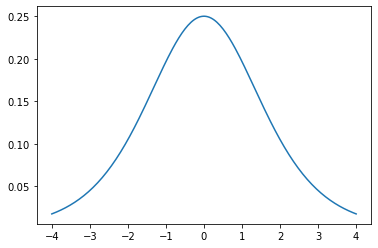

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(x))

x = np.linspace(-4, 4, num=200)
plt.plot(x, sigmoid(x) * sigmoid(-1 * x))
plt.show()

After graphing the derivative of the sigmoid function, we see that its values are capped at 0.25, and in fact is far less than 0.25 for most of its domain. The deeper the network, the more sigmoid derivatives are multiplied in the chain rule computation, which can result in gradients that become extremely small. This is the vanishing gradient problem, because $x^n, x \in [0, 0.25]$ diminishes exponentially with $n$.

#### Q1.7.2 (1 point WriteUp)
Often it is replaced with $\tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$. What are the output ranges of both $\tanh$ and sigmoid? Why might we prefer $\tanh$ ? 

The output range of the $\tanh$ function is -1 to 1. This is double the range of the sigmoid function with is from 0 to 1. We might prefer the $\tanh$ function because of the following question.

#### Q1.7.3 (1 point WriteUp)
Why does $\tanh(x)$ have less of a vanishing gradient problem? (plotting the derivatives helps! for reference: $\tanh'(x) = 1 - \tanh(x)^2$)

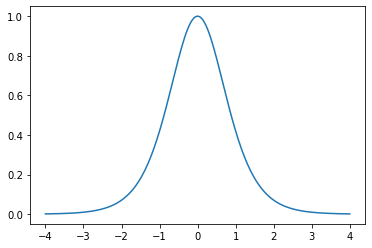

In [3]:
x = np.linspace(-4, 4, num=200)
plt.plot(x, 1 - np.tanh(x)**2)
plt.show()

The effect of this is in the magnitude of its derivative which has a range of 0 to 1 for the $\tanh$ function and only 0 to 0.25 for the sigmoid function. Therefore the gradient vanishes at a slower rate with the use of the tanh function compared to the sigmoid function.

#### Q1.7.4 (1 point WriteUp)
$\tanh$ is a scaled and shifted version of the sigmoid. Show how $\tanh(x)$ can be written in terms of $\sigma(x)$. (*Hint: consider how to make it have the same range*)

$\frac{\tanh(\frac{x}{2}) + 1}{2} = \frac{1}{2}(\frac{1-e^{-2\frac{x}{2}}}{1+e^{-2\frac{x}{2}}} + \frac{1+e^{-2\frac{x}{2}}}{1+e^{-2\frac{x}{2}}}) = \frac{1}{2}(\frac{2}{1+e^{-x}}) = \frac{1}{1+e^{-x}} = sigmoid(x)$

***
## For the following questions, please find the instructions in the corresponding jupyter notebooks.

## Q2 Implement a Fully Connected Network (65 points + 10 Extra Credit)

#### Q2.1.1 (3 points WriteUp)

Depending on the final activation function it could be 0.5 if sigmoid or $\frac{1}{n}$ for all categories if softmax. If there is no final activation function it would just be all 0s. It might not be a good idea to start with this initialization, because for each layer, the gradients for the weights will all be the same. There will be no differentiation among the neurons in the hidden layers and the features they extract.

#### Q2.1.3 (2 points WriteUp)

YOUR ANSWER HERE

## Q3 Training Models (20 Points)

### Q3.2 (3 points Code+WriteUp)

Results for 0.01 learning rate:
Validation accuracy:  0.6669444444444445
Max validation accuracy:  0.7219444444444445
Max validation accuracy index:  92

Results for 0.001 learning rate:
Validation accuracy:  0.7538888888888889
Max validation accuracy:  0.7538888888888889
Max validation accuracy index:  198

Results for 0.0001 learning rate:
Validation accuracy:  0.6708333333333333
Max validation accuracy:  0.6708333333333333
Max validation accuracy index:  199

### Q3.3 (2 points Code+WriteUp)

YOUR ANSWER HERE

### Q3.4 (3 points Code+WriteUp)

YOUR ANSWER HERE

### Q3.5 (4 points Code+WriteUp)

YOUR ANSWER HERE

## Q4 Extract Text from Images (35 points)

### Q4.1 (3 points WriteUp)

YOUR ANSWER HERE

### Q4.2 (13 points Code+WriteUp)

YOUR ANSWER HERE

### Q4.3 (6 points WriteUp)

YOUR ANSWER HERE

### Q4.4 (13 points Code+WriteUp)

YOUR ANSWER HERE

## Q5 Image Compression with Autoencoders [Extra Credit](25 points)

#### Q5.1.1 [Extra Credit](10 points Code)

YOUR ANSWER HERE

### Q5.2 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

#### Q5.3.1 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

#### Q5.3.2 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

## Q6 Comparing against PCA [Extra Credit](15 Points)

### Q6.1 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.2 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.3 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.4 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

## Q7 PyTorch (40 points)

#### Q7.1.1 (10 points Code+WriteUp)

YOUR ANSWER HERE

#### Q7.1.2 (3 points Code+WriteUp)

YOUR ANSWER HERE

#### Q7.1.3 (2 points Code+WriteUp)

YOUR ANSWER HERE

#### Q7.1.4 (15 points Code+WriteUp)

YOUR ANSWER HERE

#### Q7.2.1 (10 points WriteUp)

YOUR ANSWER HERE

## Appendix: Neural Network Overview
Deep learning has quickly become one of the most applied machine learning techniques in computer vision. Convolutional neural networks have been applied to many different computer vision problems such as image classification, recognition, and segmentation with great success. In this assignment, you will first implement a fully connected feed forward neural network for hand written character classification. Then in the second part, you will implement a system to locate characters in an image, which you can then classify with your deep network. The end result will be a system that, given an image of hand written text, will output the text contained in the image.

### Basic Use
Here we will give a brief overview of the math for a single hidden layer feed forward network. For a more detailed look at the math and derivation, please see the class slides.

A fully-connected network $\textbf{f}$, for classification, applies a series of linear and non-linear functions to an input data vector $\textbf{x}$ of size $N\times 1$ to produce an output vector $\textbf{f}(\textbf{x})$ of size $C\times 1$, where each element $i$ of the output vector represents the probability of $\textbf{x}$ belonging to the class $i$. Since the data samples are of dimensionality $N$, this means the input layer has $N$ input units. To compute the value of the output units, we must first compute the values of all the hidden layers. The first hidden layer *pre-activation* $\textbf{a}^{(1)}(\textbf{x})$ is given by

$$\textbf{a}^{(1)}(\textbf{x}) = \textbf{W}^{(1)}\textbf{x} + \textbf{b}^{(1)}$$

Then the *post-activation* values of the first hidden layer $\textbf{h}^{(1)}(\textbf{x})$ are computed by applying a non-linear activation function $\textbf{g}$ to the *pre-activation* values

$$\textbf{h}^{(1)}(\textbf{x}) = \textbf{g}(\textbf{a}^{(1)}(\textbf{x})) = \textbf{g}(\textbf{W}^{(1)}\textbf{x} + \textbf{b}^{(1)})$$

Subsequent hidden layer ($1 < t \leq T$) pre- and post activations are given by:

$$\textbf{a}^{(t)}(\textbf{x}) = \textbf{W}^{(t)}\textbf{h}^{(t-1)} + \textbf{b}^{(t)}$$

$$\textbf{h}^{(t)}(\textbf{x}) = \textbf{g}(\textbf{a}^{(t)}(\textbf{x}))$$

The output layer *pre-activations* $\textbf{a}^{(T)}(\textbf{x})$ are computed in a similar way

$$\textbf{a}^{(T)}(\textbf{x}) = \textbf{W}^{(T)}\textbf{h}^{(T-1)}(\textbf{x}) + \textbf{b}^{(T)}$$

and finally the \emph{post-activation} values of the output layer are computed with
$$\textbf{f}(\textbf{x}) = \textbf{o}(\textbf{a}^{(T)}(\textbf{x})) = \textbf{o}(\textbf{W}^{(T)}\textbf{h}^{(T-1)}(\textbf{x}) + \textbf{b}^{(T)})$$

where $\textbf{o}$ is the output activation function. Please note the difference between $\textbf{g}$ and $\textbf{o}$! 
For this assignment, we will be using the sigmoid activation function for the hidden layer, so:
$$\textbf{g}(y) = \frac{1}{1+\exp(-y)}$$
where when $\textbf{g}$ is applied to a vector, it is applied element wise across the vector.

Since we are using this deep network for classification, a common output activation function to use is the softmax function. This will allow us to turn the real value, possibly negative values of $\textbf{a}^{(T)}(\textbf{x})$ into a set of probabilities (vector of positive numbers that sum to 1). Letting $\textbf{x}_i$ denote the $i^{th}$ element of the vector $\textbf{x}$, the softmax function is defined as:
$$\textbf{o}_i(\textbf{y}) = \frac{\exp(\textbf{y}_i)}{\sum_j \exp(\textbf{y}_j)}$$

![](figures/letter_montage.jpg)
<center>Samples from NIST Special 19  dataset</center>


Gradient descent is an iterative optimisation algorithm, used to find the local optima. To find the local minima, we start at a point on the function and move in the direction of negative gradient (steepest descent) till some stopping criteria is met.

### Backprop
The update equation for a general weight $W^{(t)}_{ij}$ and bias $b^{(t)}_i$ is
$$
W^{(t)}_{ij} = W^{(t)}_{ij} - \alpha*\frac{\partial L_{\textbf{f}}}{\partial W^{(t)}_{ij}}(\textbf{x})\hspace{1cm}
b^{(t)}_{i} = b^{(t)}_{i} - \alpha*\frac{\partial L_{\textbf{f}}}{\partial b^{(t)}_{i}}(\textbf{x})
$$
$\alpha$ is the learning rate. Please refer to the back-propagation slides for more details on how to derive the gradients. Note that here we are using softmax loss (which is different from the least square loss in the slides).

## References

[1]  Xavier Glorot and Yoshua Bengio. Understanding the difficulty of training deep feedforward neural networks. 2010. http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf.

[2]  P. J. Grother. Nist special database 19 – handprinted forms and characters database. https://www.nist.gov/srd/nist-special-database-19, 1995.